In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers

import os
from sklearn.metrics import r2_score
from matplotlib.image import imread
from skimage.transform import resize

# Prepare Data

In [2]:
df = pd.read_csv('data/CombinedOutputs.csv')
y = df['Strength'].values
y = y/1000000000

imgs = []
for i in range(2525):
    img=imread('data/imgs1/'+str(i+1)+'.png')
    img_cropped = img[40:592,135:771,:]   #crop image
    img_resized = resize(img_cropped, (276, 318, 1))   # resize image
    imgs.append(img_resized)
imgs = np.array(imgs)

from sklearn.model_selection import train_test_split
x_train_, x_test, y_train_, y_test = train_test_split(imgs, y, test_size=0.05)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_, y_train_, test_size=0.15)

In [4]:
# build a CNN
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(276, 318, 1)))  
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1)) # regression

In [5]:
model.compile(loss='mse', optimizer='adam')

In [6]:
model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=20, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/100
102/102 [==============================] - 79s 769ms/step - loss: 0.4218 - val_loss: 0.0068
Epoch 2/100
102/102 [==============================] - 74s 722ms/step - loss: 0.0102 - val_loss: 0.0066
Epoch 3/100
102/102 [==============================] - 75s 731ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 4/100
102/102 [==============================] - 76s 742ms/step - loss: 0.0081 - val_loss: 0.0067
Epoch 5/100
102/102 [==============================] - 95s 930ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 6/100
102/102 [==============================] - 104s 1s/step - loss: 0.0067 - val_loss: 0.0065
Epoch 7/100
102/102 [==============================] - 102s 1s/step - loss: 0.0065 - val_loss: 0.0080
Epoch 8/100
102/102 [==============================] - 109s 1s/step - loss: 0.0065 - val_loss: 0.0085
Epoch 9/100
102/102 [==============================] - 110s 1s/step - loss: 0.0058 - val_loss: 0.0077
Epoch 10/100
102/102 [==============================] - 127s 1s/step - l

In [7]:
test_mse = model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 327ms/step - loss: 0.0042


In [8]:
#https://www.youtube.com/watch?v=9AnCNBL8c6Q
predictions = np.squeeze(model.predict(x_test))
rmse = np.sqrt(model.evaluate(x_test, y_test, verbose=0))
print(rmse)
r2 = r2_score(y_test, predictions)
print(r2)

4/4 [==============================] - 1s 315ms/step
0.0646665032144964
0.9851556309617109


In [20]:
model.save("StrengthRegression")

INFO:tensorflow:Assets written to: ImgToStrength\assets


INFO:tensorflow:Assets written to: ImgToStrength\assets


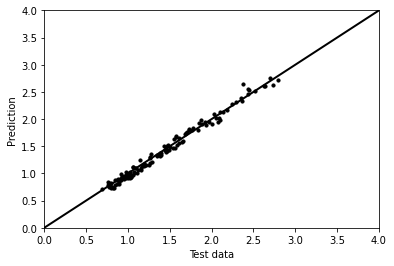

In [12]:
plt.scatter(y_test, predictions, color='black', s = 10)
plt.plot(np.array([0, 4]), np.array([0, 4]), '-k', linewidth = 2)
plt.xlim(0,4)
plt.ylim(0,4)
plt.xlabel('Test data')
plt.ylabel('Prediction')
plt.show()